In [1]:
import torch
import sys
sys.path.append('../')
from DataType.ElectricField import ElectricField
from LightSource.Gaussian_beam import Guassian_beam, VectorialGuassian_beam
from utils.Helper_Functions import normalize
from Props.RSC_Prop import *
from Props.CZT_Prop import *
from utils.units import *
from Addons.Polarization import PolarizationAnalyser

In [2]:
c0 = 2.998e8
f1 = 220e9
f2 = 330e9
wavelength1 = c0 / f1
wavelength2 = c0 / f2

fs = torch.range(f1, f2, 4e9)

wavelengths = c0 / fs
print(wavelengths)

source  = VectorialGuassian_beam(height=200, width=200, 
                        beam_waist_x=10*mm,
                        beam_waist_y=4*mm,
                        jones_vector=[1,-1j],
                        wavelengths=wavelengths, 
                        spacing=[1*mm, 1*mm],
                        alpha=torch.pi/3)

tensor([0.0014, 0.0013, 0.0013, 0.0013, 0.0013, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0010,
        0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0009, 0.0009, 0.0009,
        0.0009])


In [3]:
out = source()

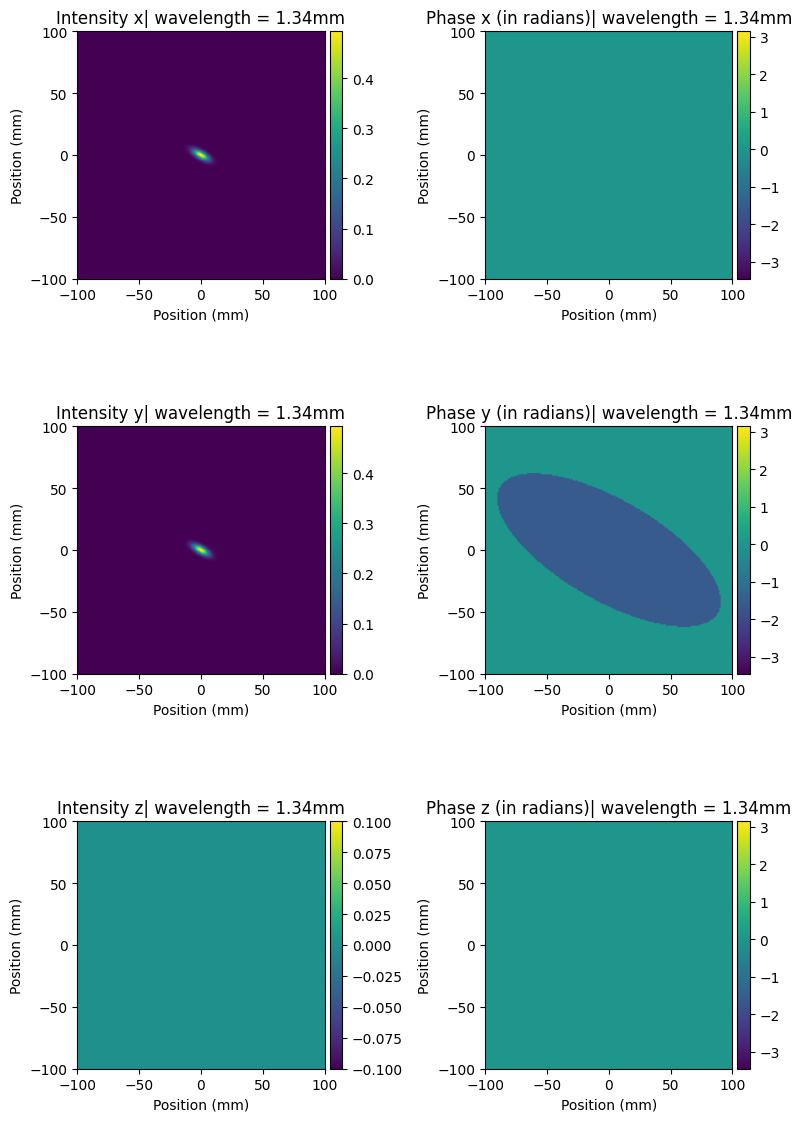

In [4]:
out.visualize(wavelength=wavelengths[1], figsize=(8, 12))

In [5]:
vrs_prop = VRS_prop(z_distance=800 * mm)
field_propagated = vrs_prop.forward(
    field = out
    )

Minimum propagation distance to satisfy energy conservation: 334.777 mm
Minimum propagation distance to satisfy sampling for FT: 389.250 mm
The simulation will be accurate !


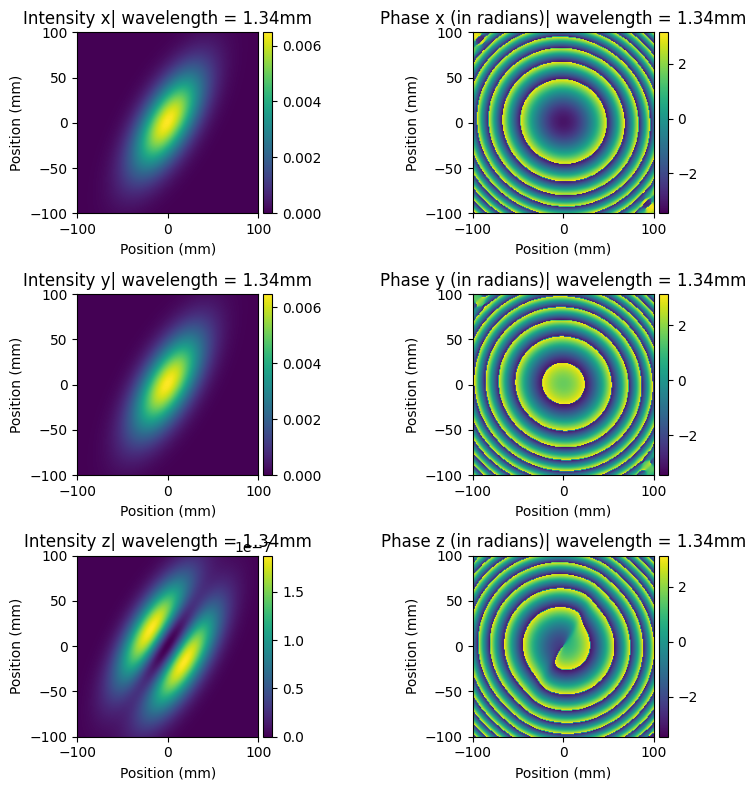

In [6]:
field_propagated.visualize(wavelength=wavelengths[1])

In [7]:
pa = PolarizationAnalyser(field_propagated)

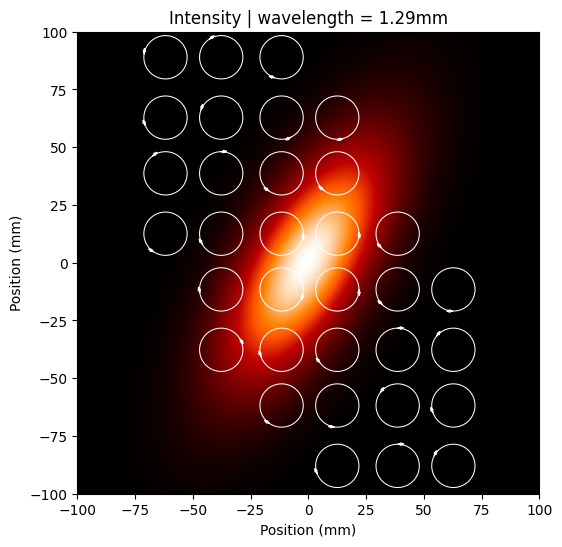

In [8]:
pa.analyze(wavelength=wavelengths[3], figsize=(6, 6), num_ellipses=(8, 8))

In [19]:
c0 = 2.998e8
f1 = 220e9
f2 = 330e9
wavelength1 = c0 / f1
wavelength2 = c0 / f2

fs = torch.range(f1, f2, 4e9)

wavelengths = c0 / fs
wavelengths = torch.range(500*nm, 600*nm, 20*nm)
print(wavelengths)

gm = Guassian_beam(height=800, width=800, 
                   beam_waist_x = 20 * um,
                   beam_waist_y = 20 * um,
                   wavelengths=wavelengths, 
                   alpha= 0,
                   spacing=1 * um)
field = gm()
    
asm_prop = RSC_prop(z_distance=20 * mm)
czt_prop = CZT_prop(z_distance=20 * mm)
    
field_propagated = asm_prop.forward(
    field = field
    )

tensor([5.0000e-07, 5.2000e-07, 5.4000e-07, 5.6000e-07, 5.8000e-07, 6.0000e-07])
Minimum propagation distance to satisfy energy conservation: 2.995 mm
Minimum propagation distance to satisfy sampling for FT: 3.098 mm
The simulation will be accurate !


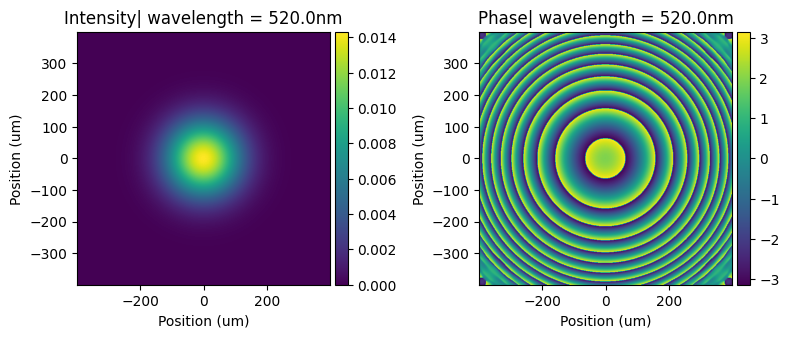

In [20]:
field_propagated.visualize(wavelength=wavelengths[1])

In [24]:
field_propagated = czt_prop.forward(
    field = field, 
    outputHeight=800,
	outputWidth=800, 						
	outputPixel_dx=0.2 * um, 
	outputPixel_dy=0.2 * um,
    )

tensor([[[[-0.3562+0.9344j, -0.4030+0.9152j, -0.4480+0.8940j,  ...,
           -0.4480-0.8940j, -0.4027-0.9153j, -0.3564-0.9343j],
          [-0.3562+0.9344j, -0.4030+0.9152j, -0.4480+0.8940j,  ...,
           -0.4480-0.8940j, -0.4027-0.9153j, -0.3564-0.9343j],
          [-0.3562+0.9344j, -0.4030+0.9152j, -0.4480+0.8940j,  ...,
           -0.4480-0.8940j, -0.4027-0.9153j, -0.3564-0.9343j],
          ...,
          [-0.3562+0.9344j, -0.4030+0.9152j, -0.4480+0.8940j,  ...,
           -0.4480-0.8940j, -0.4027-0.9153j, -0.3564-0.9343j],
          [-0.3562+0.9344j, -0.4030+0.9152j, -0.4480+0.8940j,  ...,
           -0.4480-0.8940j, -0.4027-0.9153j, -0.3564-0.9343j],
          [-0.3562+0.9344j, -0.4030+0.9152j, -0.4480+0.8940j,  ...,
           -0.4480-0.8940j, -0.4027-0.9153j, -0.3564-0.9343j]],

         [[-0.9068+0.4215j, -0.9261+0.3774j, -0.9431+0.3324j,  ...,
           -0.9433-0.3320j, -0.9261-0.3772j, -0.9069-0.4213j],
          [-0.9068+0.4215j, -0.9261+0.3774j, -0.9431+0.3324j,  ...

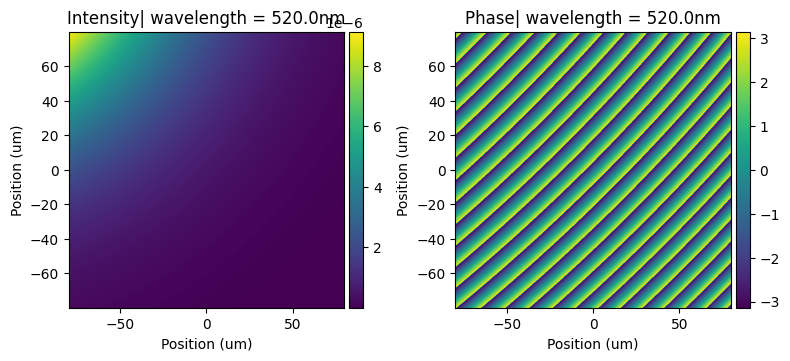

In [25]:
field_propagated.visualize(wavelength=wavelengths[1])

In [26]:
field_propagated.shape

torch.Size([1, 6, 800, 800])